In [24]:
import rasterio
import geopandas as gpd
import cartopy.crs as ccrs

# Read points from shapefile
pts = gpd.read_file('data_files/radonNI.shp')
pts = pts[['x', 'y', 'class', 'geometry']]
pts.index = range(len(pts))
coords = [(x,y) for x, y in zip(pts.x, pts.y)]

# Open the raster and store metadata
src = rasterio.open('data_files/LCM2015.tif')

# Sample the raster at every point location and store values in DataFrame
pts['Raster Value'] = [x for x in src.sample(coords)]
pts['Raster Value'] = [x[0] for x in src.sample(coords)]

In [26]:
zip(pts.geometry.x, pts.geometry.y) 

In [29]:
pts.to_file('data_files/Radon_lcm.shp') # create a new shapefile of the radon data

<ipython-input-29-b6eee02f674b>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pts.to_file('data_files/Radon_lcm.shp') # create a new shapefile of the radon data


In [30]:
radonLCM = gpd.read_file('data_files/Radon_lcm.shp') # load the radon shapefile

In [32]:
radonLCM

,x,y,class,Raster Val,geometry
0,310500,453500,1,127.0,POINT (310500.000 453500.000)
1,311500,453500,1,127.0,POINT (311500.000 453500.000)
2,312500,453500,1,127.0,POINT (312500.000 453500.000)
3,309500,452500,2,127.0,POINT (309500.000 452500.000)
4,310500,452500,2,127.0,POINT (310500.000 452500.000)
...,...,...,...,...,...
14715,327500,310500,5,127.0,POINT (327500.000 310500.000)
14716,328500,310500,4,127.0,POINT (328500.000 310500.000)
14717,329500,310500,4,127.0,POINT (329500.000 310500.000)
14718,326500,309500,4,127.0,POINT (326500.000 309500.000)


<AxesSubplot:>

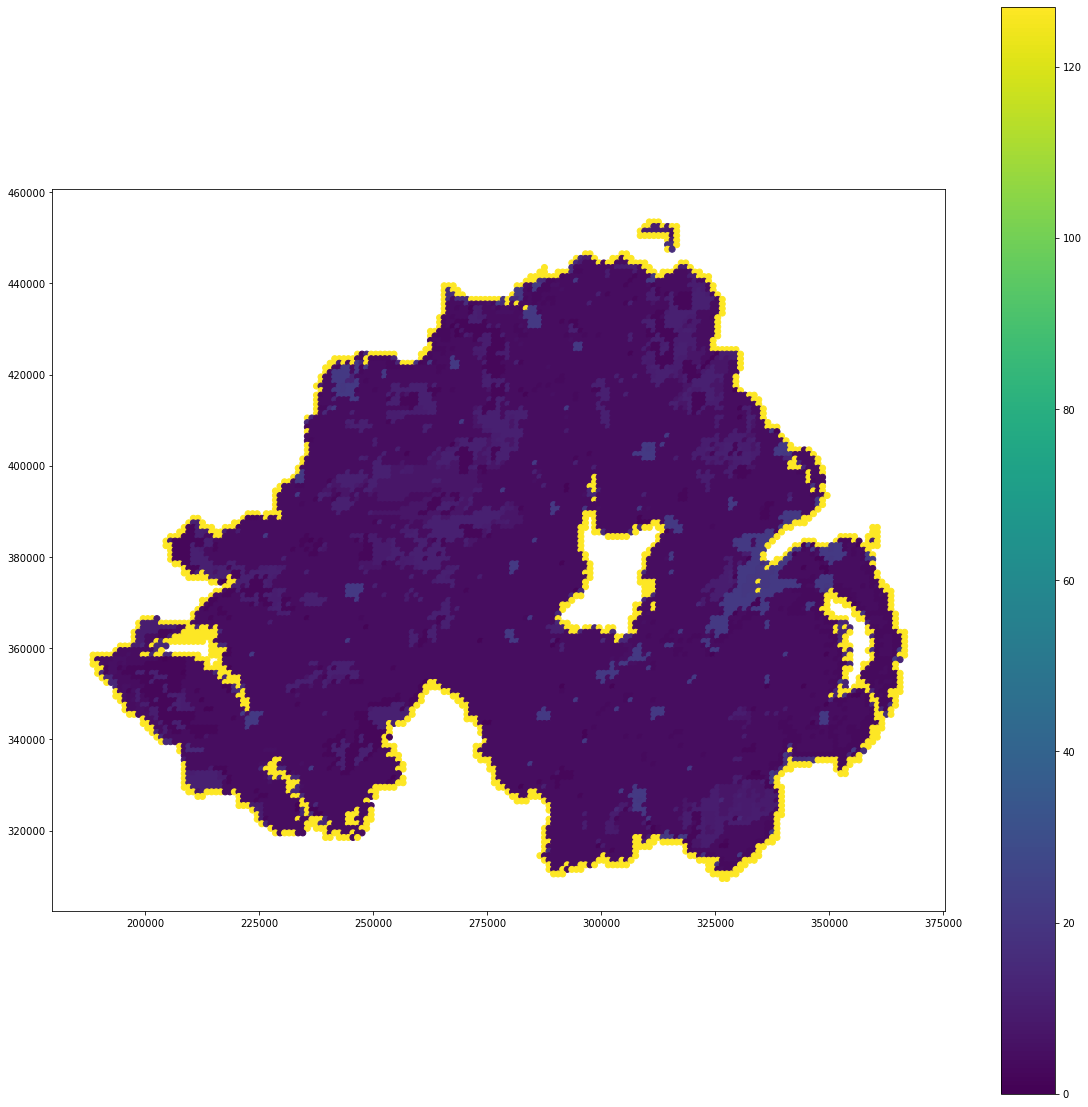

In [33]:
%matplotlib inline
radonLCM.plot(column='Raster Val', cmap=None, legend=True, figsize=(20, 20)) # display the new shapefile, symbology is based on the attribute class, i.e. radon class

<AxesSubplot:>

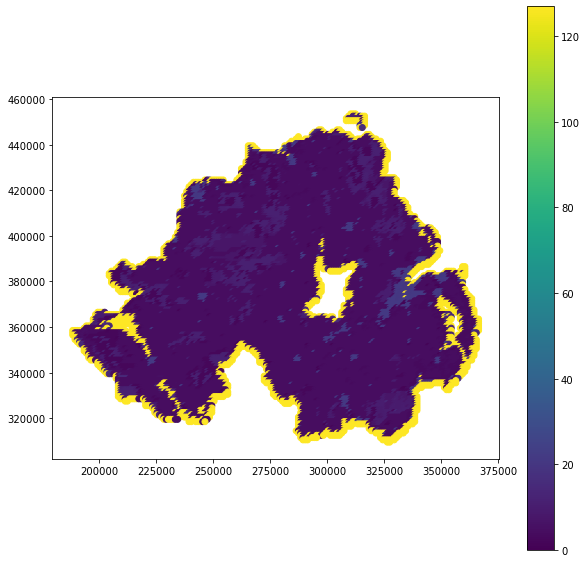

In [34]:
radonLCM.plot('Raster Val', legend=True, figsize=(10, 10)) # add symbologies and legend to the counties map

In [1]:
%matplotlib notebook

import numpy as np
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

plt.rcParams.update({'font.size': 22}) # update the font size for our plots to be size 22

In [2]:
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [3]:
lcm_raster = rio.open('data_files/LCM2015.tif')

In [4]:
# open the land cover raster and read the data
with rio.open('data_files/LCM2015.tif') as dataset:
    xmin, ymin, xmax, ymax = dataset.bounds 
    crs = dataset.crs
    lcm = dataset.read(1)
    affine_tfm = dataset.transform

# now, load the county dataset from the week 2 folder
radon = gpd.read_file('data_files/radonNI.shp').to_crs(crs)

In [5]:
def count_unique(array, nodata=0):
    '''
    Count the unique elements of an array.

    :param array: Input array
    :param nodata: nodata value to ignore in the counting
    
    :returns count_dict: a dictionary of unique values and counts
    '''
    count_dict = {}
    for val in np.unique(array):
        if val == nodata:
            continue
        count_dict[str(val)] = np.count_nonzero(array == val)
    return count_dict

unique_lcm = count_unique(lcm)
print(unique_lcm)

{'1': 91, '2': 693, '3': 498, '4': 9808, '5': 93, '6': 1, '7': 377, '9': 144, '10': 487, '11': 834, '12': 1, '13': 33, '14': 86, '15': 2, '16': 26, '17': 2, '18': 14, '20': 48, '21': 443, '127': 12094}


In [10]:
lcm_stats = zonal_stats(radon, lcm, affine=affine_tfm, categorical=True, nodata=0)

print(lcm_stats[1])

{127.0: 1}


<IPython.core.display.Javascript object>


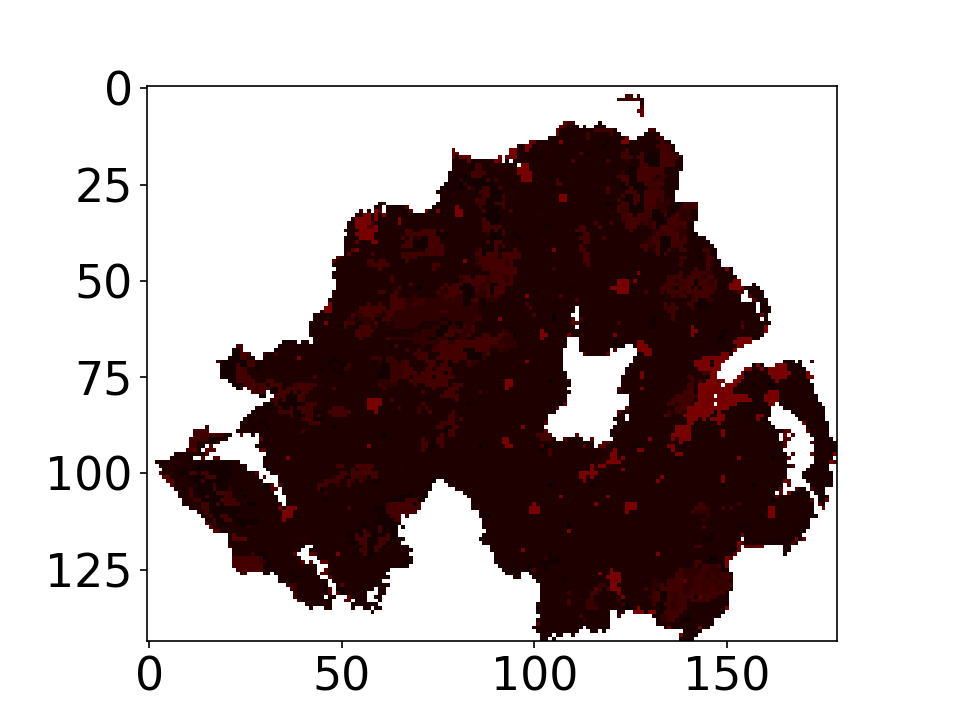

In [13]:
plt.imshow(lcm, cmap='hot')

In [15]:
radon_stats = zonal_stats(radon, lcm, affine=affine_tfm, categorical=True, nodata=0)

print(radon_stats[1])

{127.0: 1}
